In [ ]:
# @title
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Statistical Language Models
Develop statistical language models (unigram, bigram, and n-gram) using a text corpus to implement next-word prediction and sentence completion functions, and visualize the model components.

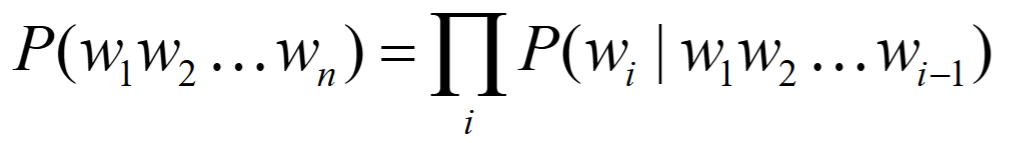

## Prepare Sample Text Data


In [ ]:
import string
import re

sample_text = (
"""
What was your childhood like?
Childhood is a universal experience, something every adult across the world has gone through. For many, childhood is a time we are nostalgic for. It’s a time of curiosity, imagination, exploration and incredible development. The fact that you are reading this article possibly means that you had a fortunate childhood that shaped you into the motivated adult you are today – here, improving your English skills. But what helped to get you this far? Who inspired you along the way? For many of us, a special adult helped us to learn and grow as children and led us to love learning. For some, it was a great teacher or wise neighbour. Others had parents, grandparents or other relatives who encouraged them to be curious and study hard. Even if your childhood wasn’t easy, you probably had at least one inspirational adult in your life who encouraged you and was a role model.

What difficulties do children face?
Unfortunately, not everyone has a good childhood. Proportionately, more children live in poverty than adults. 19.5 per cent of the world’s children live in extreme poverty, and even though children are only one third of the global population, they are half of the poor. Around the world, many children live without access to clean water, enough food, or decent healthcare. Others live in extremely dangerous places and some are forced to join armies to fight wars they don’t understand. Over 120 million children do not attend school and even those who do are not always learning: two out of five students leave primary school not knowing how to read, write or do basic maths. Even those who may have happy memories of childhood did not necessarily have an easy life as a kid. Children are dependent on the adults in their life for support, and not all adults treat children well.

What’s so special about 20 November?
Even though every day is, or at least should be, a day to nurture and celebrate children, Universal Children’s Day is celebrated as a special day around the world on 20 November. In 1989 the United Nations Convention on the Rights of the Child – a 54-item list describing the universal rights of children – was signed. This document came out of the work of a lot of experts and representatives from many nations who met to create a child-specific version of the Universal Declaration of Human Rights that was signed in 1948. The Convention on the Rights of the Child is the most widely and quickly signed treaty in history, meaning it was quickly adopted into the civil codes of most countries around the world.

What are human rights? And what are the rights of a child?
The Universal Declaration of Human Rights says that there are basic rights and freedoms that every human is entitled to, regardless of race, sex, language, religion, or anything else that may divide people. The Rights of the Child recognises that people under the age of 18 have specific needs and are entitled to their own rights. There are four main principles that these rights follow: non-discrimination, the best interests of the child, the right to life, including survival and development, and the right to be heard and taken seriously. According to this, every child has the right to safety, to care, to education, to play, to rest and to know their rights!

What can we do?
The Convention on the Rights of the Child is the world’s promise to children that we, the adults, will do everything in our power to protect them, to educate them, and to help them grow. Are you helping keep this promise? There is a lot to be done to make the world a safer, more supportive place for children. The good news is, you’re an adult and you have the power to influence the next generation in the most wonderful way. Start by explaining the Rights of the Child to the children in your life. Let them know that they, just like all human beings, have rights. Help a child learn to love learning, so they can become a motivated adult just like you.
"""
)

print(f"Original text: {sample_text}")
cleaned_text = sample_text.lower()

# Using re.sub to replace any character that is not a letter, number or space with an empty string
cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)


tokenized_words = cleaned_text.split() + ['<UNK>']

print(f"Tokenized words: {tokenized_words}")
print(f"Number of tokens: {len(tokenized_words)}")

Original text: 
What was your childhood like?
Childhood is a universal experience, something every adult across the world has gone through. For many, childhood is a time we are nostalgic for. It’s a time of curiosity, imagination, exploration and incredible development. The fact that you are reading this article possibly means that you had a fortunate childhood that shaped you into the motivated adult you are today – here, improving your English skills. But what helped to get you this far? Who inspired you along the way? For many of us, a special adult helped us to learn and grow as children and led us to love learning. For some, it was a great teacher or wise neighbour. Others had parents, grandparents or other relatives who encouraged them to be curious and study hard. Even if your childhood wasn’t easy, you probably had at least one inspirational adult in your life who encouraged you and was a role model.

What difficulties do children face?
Unfortunately, not everyone has a good ch

## Implement Unigram Model

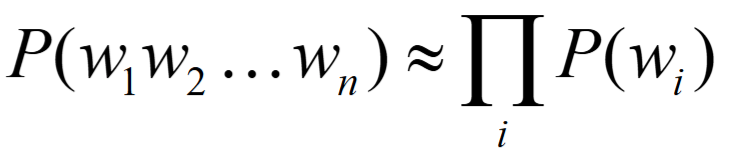

Create functions to count individual word frequencies and calculate unigram probabilities. Visualize the top unigram probabilities using a bar chart, clearly showing each word and its associated probability.


Word Counts: OrderedCounter({'the': 45, 'to': 30, 'of': 24, 'and': 21, 'a': 19, 'rights': 15, 'are': 14, 'children': 14, 'that': 11, 'you': 11, 'in': 11, 'is': 9, 'child': 9, 'childhood': 7, 'what': 6, 'was': 6, 'adult': 6, 'for': 6, 'who': 6, 'or': 6, 'do': 6, 'not': 6, 'your': 5, 'universal': 5, 'world': 5, 'this': 5, 'them': 5, 'even': 5, 'life': 5, 'have': 5, 'on': 5, 'human': 5, 'every': 4, 'many': 4, 'be': 4, 'live': 4, 'adults': 4, 'they': 4, 'day': 4, 'like': 3, 'has': 3, 'we': 3, 'had': 3, 'us': 3, 'special': 3, 'as': 3, 'learning': 3, 'around': 3, 'their': 3, 'convention': 3, 'signed': 3, 'most': 3, 'there': 3, 'right': 3, 'time': 2, 'development': 2, 'into': 2, 'motivated': 2, 'helped': 2, 'way': 2, 'learn': 2, 'grow': 2, 'love': 2, 'some': 2, 'it': 2, 'others': 2, 'encouraged': 2, 'easy': 2, 'at': 2, 'least': 2, 'one': 2, 'good': 2, 'more': 2, 'poverty': 2, 'worlds': 2, 'though': 2, 'school': 2, 'those': 2, 'out': 2, 'basic': 2, 'may': 2, 'an': 2, 'all': 2, 'so': 2, '20': 2

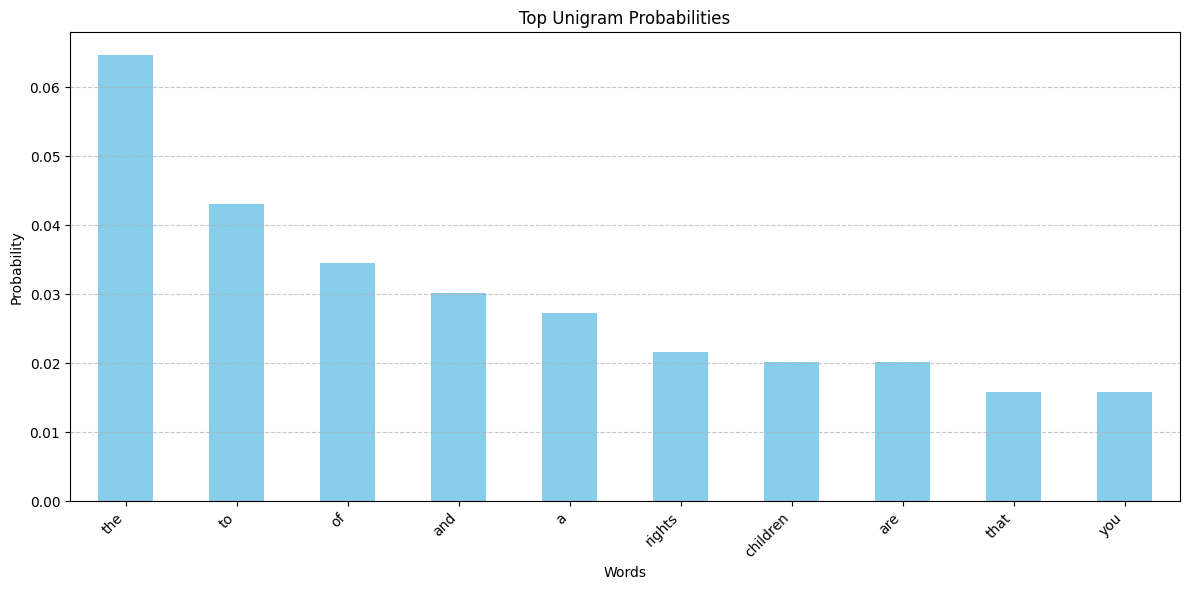

In [ ]:
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import pandas as pd

class OrderedCounter(Counter, OrderedDict):
    pass

word_counts = OrderedCounter(tokenized_words)
print(f"Word Counts: {word_counts}\n")

total_words = len(tokenized_words)
print(f"Total words: {total_words}")
print(f"Unique words: {len(set(tokenized_words))}\n")

unigram_probabilities = {}
for word, count in word_counts.items():
    unigram_probabilities[word] = count / total_words

print(f"Unigram Probabilities: {unigram_probabilities}\n")

unigram_series = pd.Series(unigram_probabilities)
top_n = 10  # Define N for top words
top_unigrams = unigram_series.sort_values(ascending=False).head(top_n)

print(f"Top {top_n} Unigrams:\n{top_unigrams}\n")

plt.figure(figsize=(12, 6))
top_unigrams.plot(kind='bar', color='skyblue')

plt.title('Top Unigram Probabilities')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Implement Bigram Model

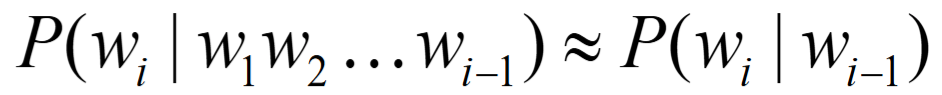

Develop functions to count bigram frequencies and calculate bigram (conditional) probabilities. Visualize a portion of the bigram transition matrix or key bigram probabilities to illustrate the concept.


In [ ]:
from collections import Counter

bigrams = [(tokenized_words[i], tokenized_words[i+1]) for i in range(len(tokenized_words) - 1)]
print(f"Sample Bigrams (first 10): {bigrams[:10]}\n")
# print(bigrams)

bigram_counts = Counter(bigrams)
print(f"Bigram Counts (first 10): {list(bigram_counts.items())[:10]}\n")

Sample Bigrams (first 10): [('what', 'was'), ('was', 'your'), ('your', 'childhood'), ('childhood', 'like'), ('like', 'childhood'), ('childhood', 'is'), ('is', 'a'), ('a', 'universal'), ('universal', 'experience'), ('experience', 'something')]

Bigram Counts (first 10): [(('what', 'was'), 1), (('was', 'your'), 1), (('your', 'childhood'), 2), (('childhood', 'like'), 1), (('like', 'childhood'), 1), (('childhood', 'is'), 2), (('is', 'a'), 3), (('a', 'universal'), 1), (('universal', 'experience'), 1), (('experience', 'something'), 1)]



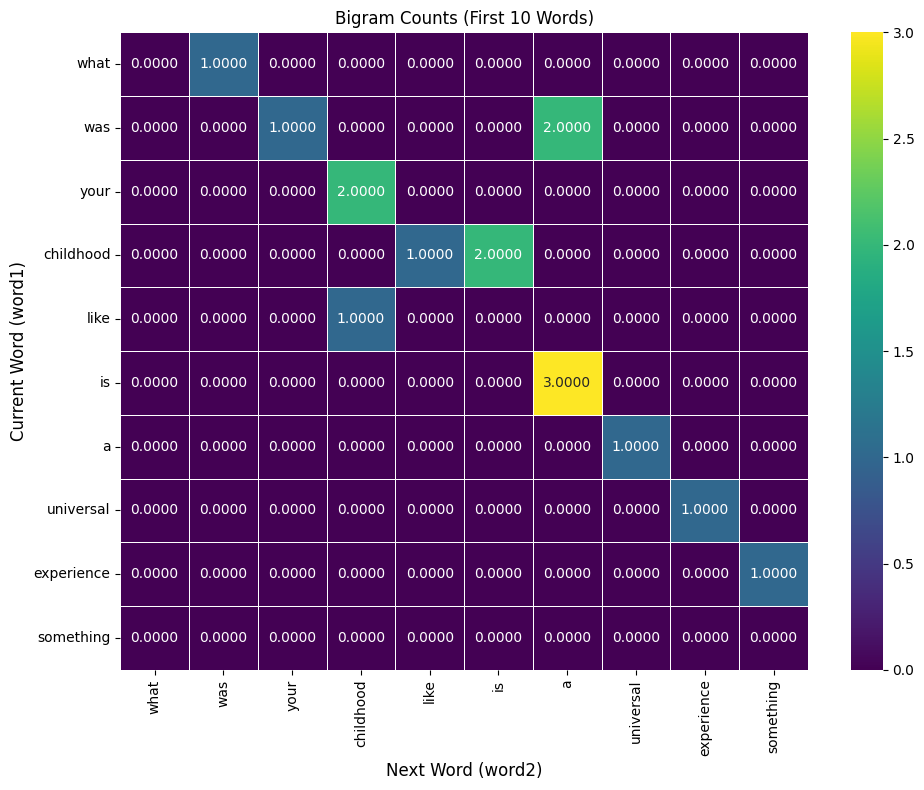

In [ ]:
word_counts = OrderedCounter(tokenized_words)
unique_words = list(word_counts.keys())[:10]

bigram_matrix = pd.DataFrame(0.0, index=unique_words, columns=unique_words)
for (word1, word2), count in bigram_counts.items():
    if word1 in unique_words and word2 in unique_words:
        bigram_matrix.loc[word1, word2] = count

import numpy as np
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(bigram_matrix, annot=True, cmap='viridis', fmt=".4f", linewidths=.5)
plt.title("Bigram Counts (First 10 Words)")
plt.xlabel('Next Word (word2)', fontsize=12)
plt.ylabel('Current Word (word1)', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10) # Rotate x-axis labels
plt.yticks(rotation=0, va='center', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
bigram_probabilities = {}
for (word1, word2), count in bigram_counts.items():
    if word1 in word_counts and word_counts[word1] > 0:
        bigram_probabilities[(word1, word2)] = count / word_counts[word1]
    else:
        bigram_probabilities[(word1, word2)] = 0.0 # Handle cases where word1 might not be in unigram counts


print(f"Bigram Conditional Probabilities (first 10):")
list(bigram_probabilities.items())[:10]

Bigram Conditional Probabilities (first 10):


[(('what', 'was'), 0.16666666666666666),
 (('was', 'your'), 0.16666666666666666),
 (('your', 'childhood'), 0.4),
 (('childhood', 'like'), 0.14285714285714285),
 (('like', 'childhood'), 0.3333333333333333),
 (('childhood', 'is'), 0.2857142857142857),
 (('is', 'a'), 0.3333333333333333),
 (('a', 'universal'), 0.05263157894736842),
 (('universal', 'experience'), 0.2),
 (('experience', 'something'), 1.0)]

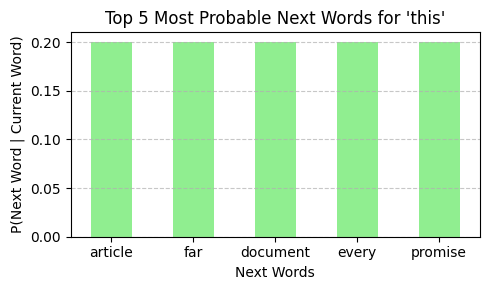

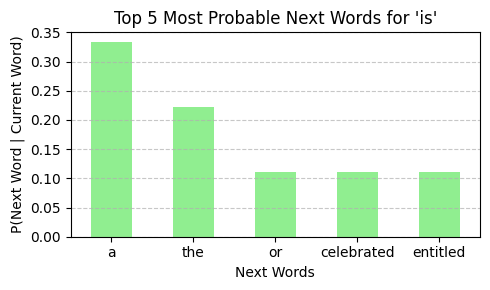

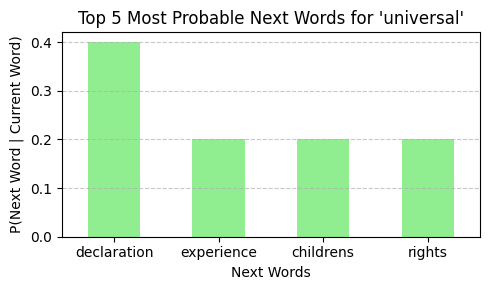

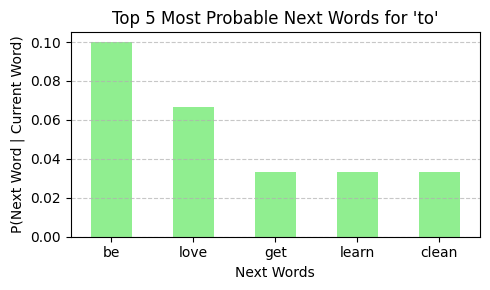

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

preceding_words_to_plot = ['this', 'is', 'universal', 'to']

top_n_next_words = 5

for word1 in preceding_words_to_plot:
    next_word_probs = {
        word2: prob
        for (w1, word2), prob in bigram_probabilities.items()
        if w1 == word1
    }

    if not next_word_probs:
        print(f"No bigrams found for '{word1}'. Skipping visualization.\n")
        continue

    next_word_series = pd.Series(next_word_probs)
    top_next_words = next_word_series.sort_values(ascending=False).head(top_n_next_words)

    plt.figure(figsize=(5, 3))
    top_next_words.plot(kind='bar', color='lightgreen')

    plt.title(f"Top {top_n_next_words} Most Probable Next Words for '{word1}'")
    plt.xlabel('Next Words')
    plt.ylabel('P(Next Word | Current Word)')
    plt.xticks(rotation=0, ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


## Implement N-gram Model (Generalized)
Generalize the concept to n-gram models (e.g., trigrams) by creating functions to count n-gram frequencies and probabilities. Explain how this extends from unigrams and bigrams.


In [ ]:
from collections import Counter

def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

trigrams = generate_ngrams(tokenized_words, 3)
print(f"Sample Trigrams (first 10): {trigrams[:10]}\n")

trigram_counts = Counter(trigrams)
print(f"Trigram Counts (first 10): {list(trigram_counts.items())[:10]}\n")

trigram_probabilities = {}
for (word1, word2, word3), count in trigram_counts.items():
    preceding_bigram = (word1, word2)
    if preceding_bigram in bigram_counts and bigram_counts[preceding_bigram] > 0:
        trigram_probabilities[(word1, word2, word3)] = count / bigram_counts[preceding_bigram]
    else:
        trigram_probabilities[(word1, word2, word3)] = 0.0 # Assign 0 if preceding bigram not found or has zero count
print(f"Trigram Conditional Probabilities (first 10): {list(trigram_probabilities.items())[:10]}\n")

Sample Trigrams (first 10): [('what', 'was', 'your'), ('was', 'your', 'childhood'), ('your', 'childhood', 'like'), ('childhood', 'like', 'childhood'), ('like', 'childhood', 'is'), ('childhood', 'is', 'a'), ('is', 'a', 'universal'), ('a', 'universal', 'experience'), ('universal', 'experience', 'something'), ('experience', 'something', 'every')]

Trigram Counts (first 10): [(('what', 'was', 'your'), 1), (('was', 'your', 'childhood'), 1), (('your', 'childhood', 'like'), 1), (('childhood', 'like', 'childhood'), 1), (('like', 'childhood', 'is'), 1), (('childhood', 'is', 'a'), 2), (('is', 'a', 'universal'), 1), (('a', 'universal', 'experience'), 1), (('universal', 'experience', 'something'), 1), (('experience', 'something', 'every'), 1)]

Trigram Conditional Probabilities (first 10): [(('what', 'was', 'your'), 1.0), (('was', 'your', 'childhood'), 1.0), (('your', 'childhood', 'like'), 0.5), (('childhood', 'like', 'childhood'), 1.0), (('like', 'childhood', 'is'), 1.0), (('childhood', 'is', 'a'

### Explanation: Generalizing to N-gram Models

**Unigram Model (N=1):**
A unigram model considers each word independently. The probability of a word is simply its frequency in the corpus divided by the total number of words:

P(word) = Count(word) / Total Words

**Bigram Model (N=2):**
A bigram model considers the probability of a word given the immediately preceding word. This introduces a notion of sequence. The conditional probability of a bigram is calculated as:

P(word2 | word1) = Count(word1, word2) / Count(word1)

**N-gram Model (N >= 2, e.g., Trigram N=3):**
An n-gram model extends this concept further by considering the probability of a word given the `N-1` preceding words. For a trigram model (N=3), we calculate the probability of the third word given the two preceding words:

P(word3 | word1, word2) = Count(word1, word2, word3) / Count(word1, word2)

**Generalization:**
In general, for an N-gram model, the probability of the *n-th* word ($w_n$) given its preceding *N-1* words ($w_{n-(N-1)}, ..., w_{n-1}$) is:

P($w_n$ | $w_{n-(N-1)}, ..., w_{n-1}$) = Count($w_{n-(N-1)}, ..., w_n$) / Count($w_{n-(N-1)}, ..., w_{n-1}$)

Essentially, as 'N' increases, the model takes into account more context (more preceding words) to predict the next word. This allows for more nuanced and context-aware predictions, but also leads to increased data sparsity issues (many possible N-grams will not appear in the training corpus, especially for larger N values) and higher computational costs.

## Create Next Word Prediction Function
It takes a partial sentence as input. This function will use the trained language models (primarily bigram or n-gram) to predict the most probable next word and output it. The function should show the probabilities of potential next words.


In [ ]:
import re

def predict_next_word(partial_sentence):
    cleaned_partial_sentence = partial_sentence.lower()
    cleaned_partial_sentence = re.sub(r'[^\w\s]', '', cleaned_partial_sentence)
    tokenized_partial_sentence = cleaned_partial_sentence.split()
    for idx, word in enumerate(tokenized_partial_sentence):
      if word not in tokenized_words:
        tokenized_partial_sentence[idx] = '<UNK>'
    print('---')
    print(f"Predicting for: '{partial_sentence}'")

    possible_next_words = {}

    if len(tokenized_partial_sentence) >= 2:
        # Use trigram model (P(word3 | word1, word2))
        word1, word2 = tokenized_partial_sentence[-2], tokenized_partial_sentence[-1]
        print(f"Using trigram context: ({word1}, {word2})")
        for (w1, w2, w3), prob in trigram_probabilities.items():
            if w1 == word1 and w2 == word2:
                possible_next_words[w3] = prob
    elif len(tokenized_partial_sentence) == 1:
        # Use bigram model (P(word2 | word1))
        word1 = tokenized_partial_sentence[-1]
        print(f"Using bigram context: ({word1})")
        for (w1, w2), prob in bigram_probabilities.items():
            if w1 == word1:
                possible_next_words[w2] = prob
    else:
        # Use unigram model (for empty sentence)
        print("Using unigram probabilities (empty context)")
        possible_next_words = unigram_probabilities

    filtered_predictions = {word: prob for word, prob in possible_next_words.items() if prob > 0}
    sorted_predictions = sorted(filtered_predictions.items(), key=lambda item: item[1], reverse=True)

    if sorted_predictions:
        print("Top predicted next words:")
        for word, prob in sorted_predictions[:5]: # Print top 5 predictions
            print(f"  - {word}: {prob:.4f}")
    else:
        print("No prediction can be made based on the current models/context.")

predict_next_word("childhood is")
predict_next_word("is a")
predict_next_word("") # Empty string
predict_next_word("nonexistent word") # Word not in corpus


---
Predicting for: 'childhood is'
Using trigram context: (childhood, is)
Top predicted next words:
  - a: 1.0000
---
Predicting for: 'is a'
Using trigram context: (is, a)
Top predicted next words:
  - universal: 0.3333
  - time: 0.3333
  - lot: 0.3333
---
Predicting for: ''
Using unigram probabilities (empty context)
Top predicted next words:
  - the: 0.0647
  - to: 0.0432
  - of: 0.0345
  - and: 0.0302
  - a: 0.0273
---
Predicting for: 'nonexistent word'
Using trigram context: (<UNK>, <UNK>)
No prediction can be made based on the current models/context.


## Create Sentence Completion Function

It will preprocess the initial partial sentence, then enter a loop to predict `num_words_to_predict` words. In each iteration, it will construct the current partial sentence from the accumulated words and call `predict_next_word`. The most probable next word will be appended, and the process will repeat. Finally, the full completed sentence will be returned and tested with various examples.

In [ ]:

import re


def complete_sentence(partial_sentence, num_words_to_predict):
    """
    This function performs a simple greedy next-word prediction using trigram -> bigram -> unigram backoff.
    """

    # 1) Normalize input: lowercase and remove punctuation (retain only word characters and whitespace)
    cleaned_partial_sentence = partial_sentence.lower()
    cleaned_partial_sentence = re.sub(r"[^\w\s]", "", cleaned_partial_sentence)

    # 2) Tokenize the cleaned partial sentence into words (split on whitespace)
    predicted_words = cleaned_partial_sentence.split() if cleaned_partial_sentence else []

    # 3) Replace out-of-vocabulary words with a placeholder token '<UNK>' so later n-gram lookups don't fail.
    #    `tokenized_words` is expected to be a collection (set/list) of known tokens defined externally.
    for idx, word in enumerate(predicted_words):
        if word not in tokenized_words:
            predicted_words[idx] = '<UNK>'

    # Make a copy that represents the current context tokens (we will append to this as predictions are made).
    current_sentence_tokens = list(predicted_words)

    print(f"\n--- Completing sentence for: '{partial_sentence}' (Predict {num_words_to_predict} words) ---")

    # 4) Iteratively predict the next word `num_words_to_predict` times
    for _ in range(num_words_to_predict):
        possible_next_words = {}  # will hold candidate next words and their probabilities

        # 4a) If we have at least two tokens of context, prefer trigram probabilities (word1, word2 -> word3)
        if len(current_sentence_tokens) >= 2:
            word1, word2 = current_sentence_tokens[-2], current_sentence_tokens[-1]
            # Search trigram table for entries that match the last two context words
            for (w1, w2, w3), prob in trigram_probabilities.items():
                if w1 == word1 and w2 == word2:
                    possible_next_words[w3] = prob

        # 4b) If only one token of context is available, use bigram probabilities (word1 -> word2)
        elif len(current_sentence_tokens) == 1:
            word1 = current_sentence_tokens[-1]
            for (w1, w2), prob in bigram_probabilities.items():
                if w1 == word1:
                    possible_next_words[w2] = prob

        # 4c) If there is no context (empty input), fall back to unigram probabilities
        else:
            # unigram_probabilities expected to be a dict mapping token -> probability
            possible_next_words = unigram_probabilities

        # 5) Filter out zero-probability candidates (keep only positive probability predictions)
        filtered_predictions = {word: prob for word, prob in possible_next_words.items() if prob > 0}

        # 6) Sort candidates by probability in descending order (greedy selection of top candidate)
        sorted_predictions = sorted(filtered_predictions.items(), key=lambda item: item[1], reverse=True)

        # 7) If we have at least one candidate, choose the highest-probability word and append it to the sentence
        if sorted_predictions:
            next_word = sorted_predictions[0][0]
            predicted_words.append(next_word)
            # Update the context for the next prediction step
            current_sentence_tokens.append(next_word)
            print(f"  Predicted next: '{next_word}'. Current sentence: {' '.join(predicted_words)}")
        else:
            # No candidates available for prediction (e.g., unseen context with no backoff); stop early
            print("  No further prediction can be made. Stopping.")
            break

    # 8) Join predicted tokens to form the completed sentence and return
    completed_sentence = ' '.join(predicted_words)
    print(f"Completed sentence: '{completed_sentence}'")
    return completed_sentence


complete_sentence("childhood is", 3)
complete_sentence("childhood is stupidity", 3)
complete_sentence("", 5)
complete_sentence("is a", 2)


--- Completing sentence for: 'childhood is' (Predict 3 words) ---
  Predicted next: 'a'. Current sentence: childhood is a
  Predicted next: 'universal'. Current sentence: childhood is a universal
  Predicted next: 'experience'. Current sentence: childhood is a universal experience
Completed sentence: 'childhood is a universal experience'

--- Completing sentence for: 'childhood is stupidity' (Predict 3 words) ---
  No further prediction can be made. Stopping.
Completed sentence: 'childhood is <UNK>'

--- Completing sentence for: '' (Predict 5 words) ---
  Predicted next: 'the'. Current sentence: the
  Predicted next: 'rights'. Current sentence: the rights
  Predicted next: 'of'. Current sentence: the rights of
  Predicted next: 'the'. Current sentence: the rights of the
  Predicted next: 'child'. Current sentence: the rights of the child
Completed sentence: 'the rights of the child'

--- Completing sentence for: 'is a' (Predict 2 words) ---
  Predicted next: 'universal'. Current sente

'is a universal experience'

## Visualize Unsmoothed Bigram Matrix

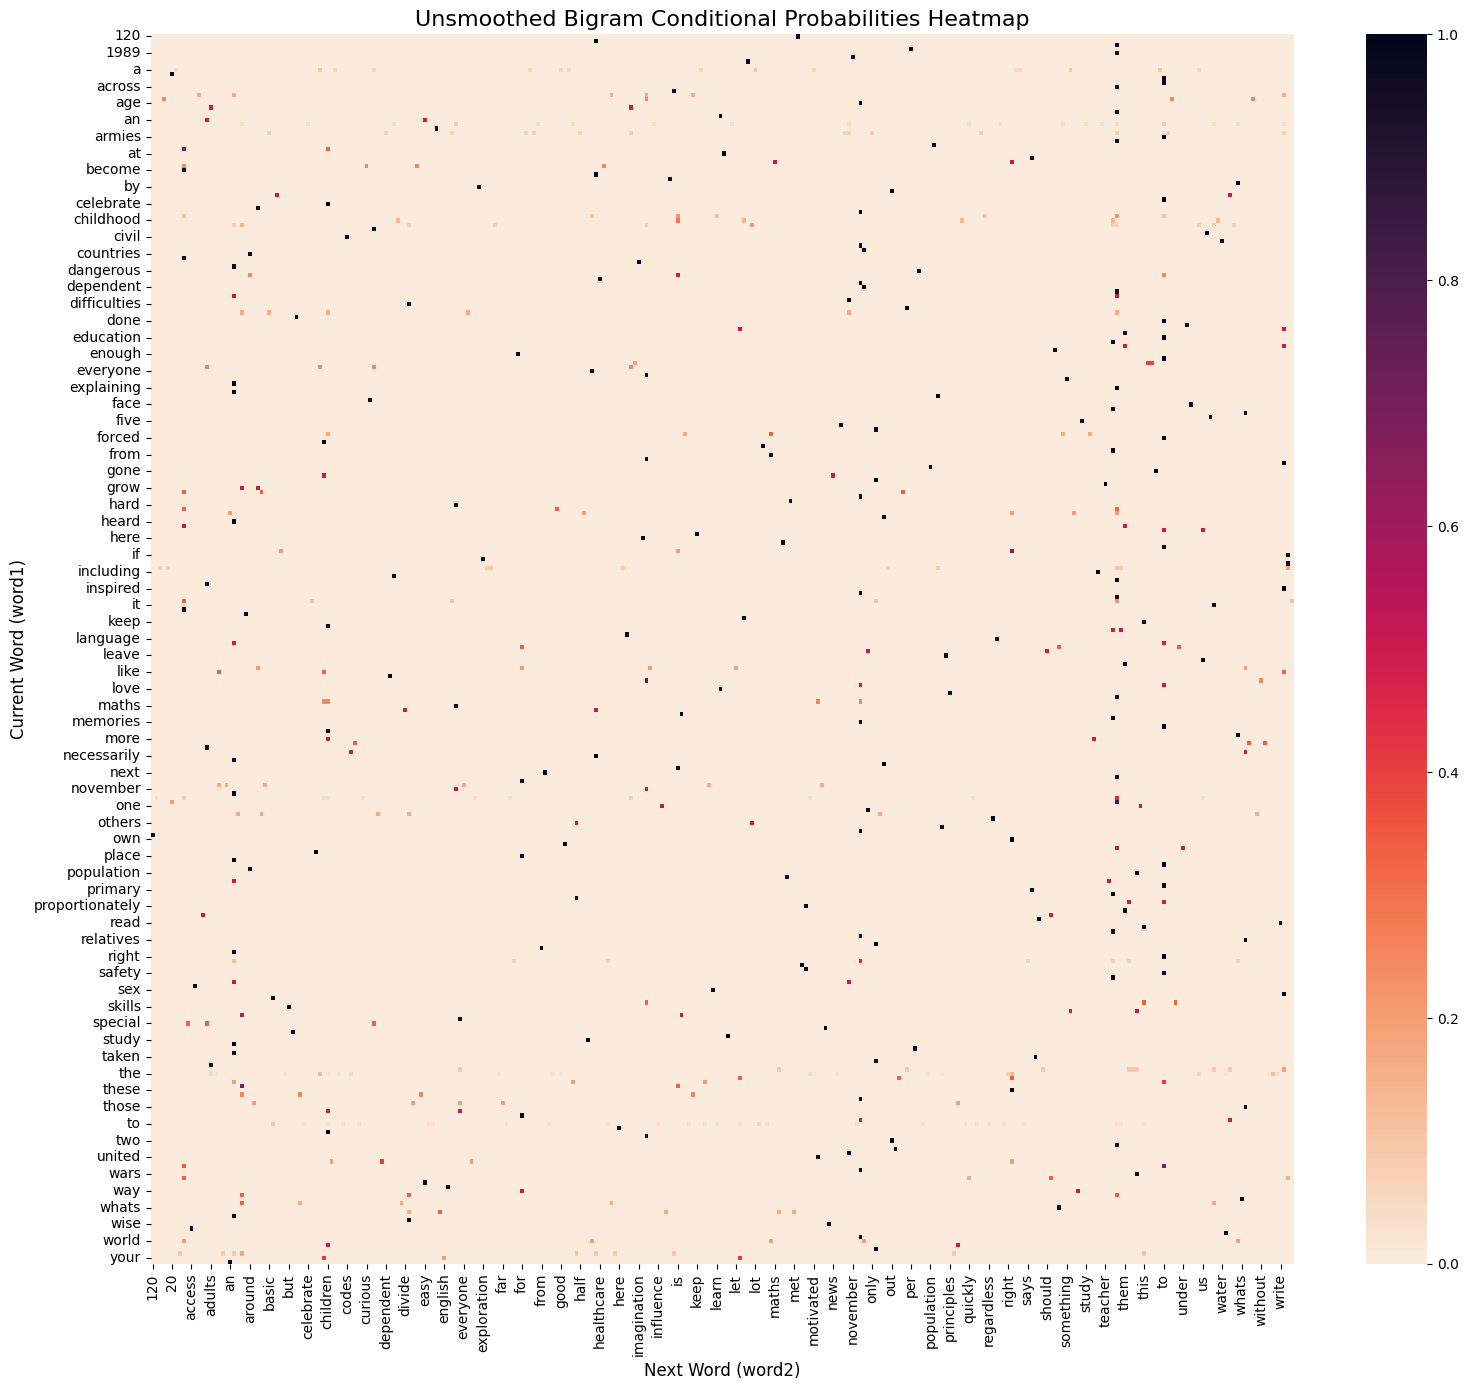

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

unique_words = sorted(list(set(tokenized_words)))
bigram_matrix = pd.DataFrame(0.0, index=unique_words, columns=unique_words)

for (word1, word2), prob in bigram_probabilities.items():
    if word1 in unique_words and word2 in unique_words:
        bigram_matrix.loc[word1, word2] = prob

plt.figure(figsize=(16, 14))
sns.heatmap(bigram_matrix, annot=False, cmap='rocket_r', fmt=".2f", linewidths=0)
plt.title('Unsmoothed Bigram Conditional Probabilities Heatmap', fontsize=16)
plt.xlabel('Next Word (word2)', fontsize=12)
plt.ylabel('Current Word (word1)', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10) # Rotate x-axis labels
plt.yticks(rotation=0, va='center', fontsize=10)

# 6. Display the plot
plt.tight_layout()
plt.show()

## Implement Laplace Smoothing
Implement Laplace (add-1) smoothing for the model. This involves adjusting bigram counts and unigram counts to ensure no zero probabilities, and recalculating the conditional probabilities for the smoothed bigram model.

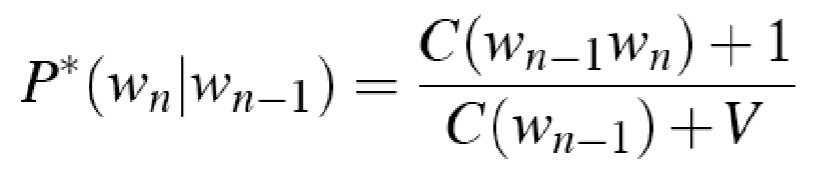

In [ ]:
import collections

V = len(unique_words)
smoothed_unigram_probabilities = {}

for word1 in unique_words:
    unigram_count = word_counts.get(word1, 0)
    # Laplace-smoothed probability:
    # P(w) = (count(w) + 1) / (N + V)
    smoothed_prob = (unigram_count + 1) / (unigram_count + V)
    smoothed_unigram_probabilities[word1] = smoothed_prob

In [ ]:
import collections

V = len(unique_words)
smoothed_bigram_probabilities = {}

for word1 in unique_words:
    for word2 in unique_words:
        bigram_count = bigram_counts.get((word1, word2), 0)
        unigram_count = word_counts.get(word1, 0)
        # Laplace-smoothed bigram probability:
        # P(word2 | word1) = (count(word1, word2) + 1) / (count(word1) + V)
        smoothed_prob = (bigram_count + 1) / (unigram_count + V)
        smoothed_bigram_probabilities[(word1, word2)] = smoothed_prob

## Visualize Smoothed Bigram Matrix


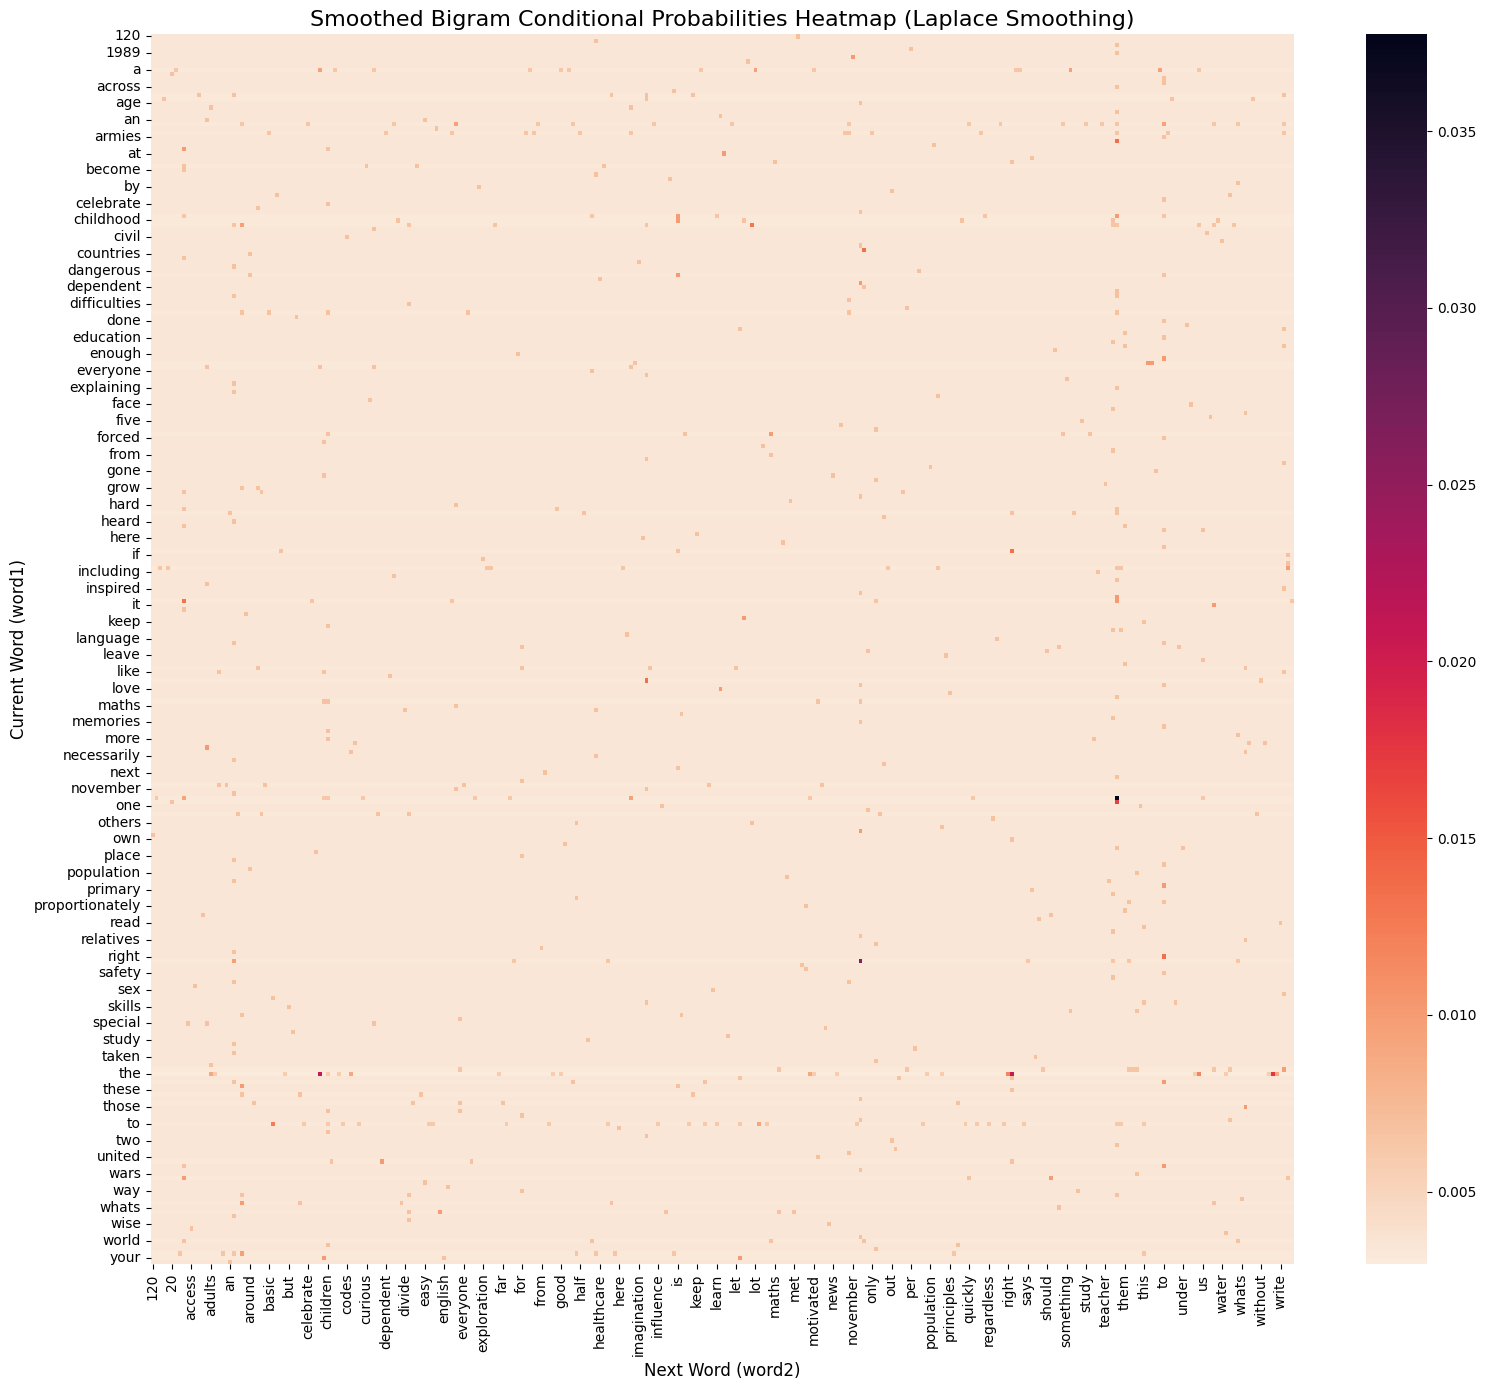

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

smoothed_bigram_matrix = pd.DataFrame(0.0, index=unique_words, columns=unique_words)

for (word1, word2), prob in smoothed_bigram_probabilities.items():
    if word1 in unique_words and word2 in unique_words:
        smoothed_bigram_matrix.loc[word1, word2] = prob

plt.figure(figsize=(16, 14)) # Adjust figure size for better readability
sns.heatmap(smoothed_bigram_matrix, annot=False, cmap='rocket_r', fmt=".4f", linewidths=0)

plt.title('Smoothed Bigram Conditional Probabilities Heatmap (Laplace Smoothing)', fontsize=16)
plt.xlabel('Next Word (word2)', fontsize=12)
plt.ylabel('Current Word (word1)', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10) # Rotate x-axis labels
plt.yticks(rotation=0, va='center', fontsize=10)
plt.tight_layout()
plt.show()

## Comparison

In [ ]:
import collections

comparison_bigrams = [
    ('childhood', 'is'),
    ('universal', 'experience'),
    ('this', 'is'),
    ('is', 'love'),
    ('love', 'model'),   # 'model' is not in vocabulary, but 'love' is
    ('new', 'word')          # Neither word in vocabulary
]

print("\n--- Comparing Unsmoothed vs. Smoothed Bigram Probabilities ---\n")
print(f"{'Bigram':<30} {'Unsmoothed P':<15} {'Smoothed P':<15}")
print("-" * 60)

# 2. Iterate through the chosen bigrams and print their probabilities
for word1, word2 in comparison_bigrams:
    # a. Retrieve unsmoothed probability
    unsmoothed_prob = bigram_probabilities.get((word1, word2), 0.0)

    # b. Retrieve smoothed probability (or calculate if it wasn't pre-calculated, though it should be)
    if word1 in unique_words and word2 in unique_words:
        smoothed_prob = smoothed_bigram_probabilities.get((word1, word2), 0.0)
    else:
        # If word1 or word2 are not in the vocabulary, they wouldn't have been part of the smoothed_bigram_probabilities
        # For demonstration purposes, we can assume a very low or default smoothed probability for completely new words/pairs
        # Or, we can indicate they are out-of-vocabulary (OOV)
        smoothed_prob = 0.0 # Indicate OOV or very low probability for words not in vocabulary


    # c. Print the comparison
    print(f"{str((word1, word2)):<30} {unsmoothed_prob:<15.6f} {smoothed_prob:<15.6f}")


--- Comparing Unsmoothed vs. Smoothed Bigram Probabilities ---

Bigram                         Unsmoothed P    Smoothed P     
------------------------------------------------------------
('childhood', 'is')            0.285714        0.009967       
('universal', 'experience')    0.200000        0.006689       
('this', 'is')                 0.000000        0.003344       
('is', 'love')                 0.000000        0.003300       
('love', 'model')              0.000000        0.003378       
('new', 'word')                0.000000        0.000000       


## Backoff and Interpolation

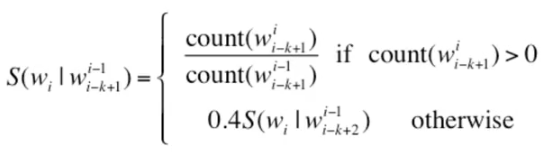

In [ ]:
import re

def complete_sentence_with_backoff(partial_sentence,
                                   num_words_to_predict,
                                   backoff_weight=0.4):
    """
    Complete the partial_sentence by predicting num_words_to_predict tokens using
    trigram -> bigram -> unigram backoff. Uses smoothed_bigram_probabilities
    and unigram_probabilities (assumed available in globals).
    """
    # sanitize input
    cleaned = partial_sentence.lower()
    cleaned = re.sub(r'[^\w\s]', '', cleaned)
    predicted_words = cleaned.split() if cleaned else []

    # map OOV input tokens to <UNK> if tokenized_words available
    vocab = set(globals().get("tokenized_words", []))
    for i, w in enumerate(predicted_words):
        if vocab and w not in vocab:
            predicted_words[i] = "<UNK>"

    current_tokens = list(predicted_words)  # work copy

    trigram_probabilities = globals().get("trigram_probabilities", {})          # keys: (w1,w2,w3)
    smoothed_bigram_probabilities = globals().get("smoothed_bigram_probabilities", {})  # keys: (w1,w2)
    unigram_probabilities = globals().get("unigram_probabilities", {})          # keys: w

    # Candidate universe: prefer unique_words if present, else unigram keys
    unique_words = set(globals().get("unique_words", set(unigram_probabilities.keys())))
    if not unique_words:
        unique_words = set(unigram_probabilities.keys())

    print(f"\n--- Completing sentence for: '{partial_sentence}' (Predict {num_words_to_predict} words) ---")

    for _ in range(num_words_to_predict):
        tokens_for_pred = list(current_tokens)
        candidates = set()
        scores = {}

        if len(tokens_for_pred) >= 2:
            w1, w2 = tokens_for_pred[-2], tokens_for_pred[-1]
            # add observed trigram continuations
            for (t1, t2, t3) in trigram_probabilities.keys():
                if t1 == w1 and t2 == w2:
                    candidates.add(t3)
            # also add bigram continuations and a small unigram pool
            for (b1, b2) in smoothed_bigram_probabilities.keys():
                if b1 == w2:
                    candidates.add(b2)
            # union with vocabulary (can be large; adjust if performance matters)
            candidates |= unique_words

            # compute backoff-aware score per candidate
            for cand in candidates:
                p_tri = trigram_probabilities.get((w1, w2, cand), 0.0)
                if p_tri > 0.0:
                    score = p_tri  # prefer trigram prob directly
                else:
                    p_bi = smoothed_bigram_probabilities.get((w2, cand), 0.0)
                    if p_bi > 0.0:
                        score = backoff_weight * p_bi
                    else:
                        p_uni = unigram_probabilities.get(cand, 0.0)
                        score = (backoff_weight ** 2) * p_uni
                scores[cand] = score

        elif len(tokens_for_pred) == 1:
            w1 = tokens_for_pred[-1]
            # bigram continuations
            for (b1, b2) in smoothed_bigram_probabilities.keys():
                if b1 == w1:
                    candidates.add(b2)
            candidates |= unique_words

            # compute bigram -> unigram backoff
            for cand in candidates:
                p_bi = smoothed_bigram_probabilities.get((w1, cand), 0.0)
                if p_bi > 0.0:
                    score = p_bi
                else:
                    p_uni = unigram_probabilities.get(cand, 0.0)
                    score = backoff_weight * p_uni
                scores[cand] = score

        else:
            # no context — use unigram probabilities
            for cand, p_uni in unigram_probabilities.items():
                scores[cand] = p_uni

        # Filter out zero-score candidates and pick the best
        filtered = {w: s for w, s in scores.items() if s > 0.0}
        if not filtered:
            # fallback: pick most frequent unigram if available
            if unigram_probabilities:
                next_word = max(unigram_probabilities.items(), key=lambda x: x[1])[0]
            else:
                print("  No further prediction can be made. Stopping.")
                break
        else:
            next_word = max(filtered.items(), key=lambda x: x[1])[0]

        predicted_words.append(next_word)
        current_tokens.append(next_word)
        print(f"  Predicted next: '{next_word}'. Current sentence: {' '.join(predicted_words)}")

    completed = ' '.join(predicted_words)
    print(f"Completed sentence: '{completed}'")
    return completed

complete_sentence_with_backoff("childhood is", 3)
complete_sentence_with_backoff("childhood is stupidity", 3)
complete_sentence_with_backoff("", 5)
complete_sentence_with_backoff("is a", 2)


--- Completing sentence for: 'childhood is' (Predict 3 words) ---
  Predicted next: 'a'. Current sentence: childhood is a
  Predicted next: 'lot'. Current sentence: childhood is a lot
  Predicted next: 'of'. Current sentence: childhood is a lot of
Completed sentence: 'childhood is a lot of'

--- Completing sentence for: 'childhood is stupidity' (Predict 3 words) ---
  Predicted next: 'teacher'. Current sentence: childhood is <UNK> teacher
  Predicted next: 'or'. Current sentence: childhood is <UNK> teacher or
  Predicted next: 'wise'. Current sentence: childhood is <UNK> teacher or wise
Completed sentence: 'childhood is <UNK> teacher or wise'

--- Completing sentence for: '' (Predict 5 words) ---
  Predicted next: 'the'. Current sentence: the
  Predicted next: 'rights'. Current sentence: the rights
  Predicted next: 'of'. Current sentence: the rights of
  Predicted next: 'the'. Current sentence: the rights of the
  Predicted next: 'child'. Current sentence: the rights of the child
Com

'is a lot of'

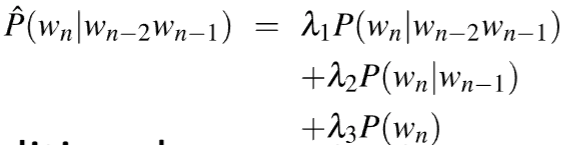

In [ ]:
import re

def complete_sentence_with_interpolation(partial_sentence,
                                         num_words_to_predict,
                                         lambda3=0.6,  # weight for trigram
                                         lambda2=0.3,  # weight for bigram
                                         lambda1=0.1): # weight for unigram
    cleaned_partial_sentence = partial_sentence.lower()
    cleaned_partial_sentence = re.sub(r'[^\w\s]', '', cleaned_partial_sentence)
    predicted_words = cleaned_partial_sentence.split() if cleaned_partial_sentence else []

    for idx, w in enumerate(predicted_words):
        if w not in tokenized_words:
            predicted_words[idx] = "<UNK>"

    current_sentence_tokens = list(predicted_words)  # copy used for context
    unique_words = set(globals().get("unique_words", set(unigram_probabilities.keys())))
    if not unique_words:
        unique_words = set(unigram_probabilities.keys())

    print(f"\n--- Completing sentence for: '{partial_sentence}' (Predict {num_words_to_predict} words) ---")

    for _ in range(num_words_to_predict):
        candidates = set()

        # If 2+ tokens available, get trigram continuations for that context
        if len(current_sentence_tokens) >= 2:
            w1, w2 = current_sentence_tokens[-2], current_sentence_tokens[-1]
            # Add all w3 where (w1,w2,w3) exists
            for (t1, t2, t3) in trigram_probabilities.keys():
                if t1 == w1 and t2 == w2:
                    candidates.add(t3)
            # also allow bigram continuations and unigram candidates
            for (b1, b2) in bigram_probabilities.keys():
                if b1 == w2:
                    candidates.add(b2)
            candidates |= unique_words

            # compute interpolated score for each candidate
            scored = {}
            for cand in candidates:
                p_tri = trigram_probabilities.get((w1, w2, cand), 0.0)
                p_bi  = bigram_probabilities.get((w2, cand), 0.0)
                p_uni = unigram_probabilities.get(cand, 0.0)
                score = lambda3 * p_tri + lambda2 * p_bi + lambda1 * p_uni
                scored[cand] = score

        # If exactly 1 token, use bigram + unigram interpolation
        elif len(current_sentence_tokens) == 1:
            w1 = current_sentence_tokens[-1]
            for (b1, b2) in bigram_probabilities.keys():
                if b1 == w1:
                    candidates.add(b2)
            candidates |= unique_words

            # renormalize weights: use lambda2 for bigram, lambda1 for unigram
            total = lambda2 + lambda1
            lam_bi = lambda2 / total
            lam_uni = lambda1 / total

            scored = {}
            for cand in candidates:
                p_bi  = bigram_probabilities.get((w1, cand), 0.0)
                p_uni = unigram_probabilities.get(cand, 0.0)
                score = lam_bi * p_bi + lam_uni * p_uni
                scored[cand] = score

        # No context: use unigram probabilities only
        else:
            scored = {w: unigram_probabilities.get(w, 0.0) for w in unique_words}

        # filter and choose best candidate
        # Optionally filter low / zero scores:
        filtered = {w: s for w, s in scored.items() if s > 0}
        if not filtered:
            # if nothing positive, fall back to the top unigram
            if unigram_probabilities:
                next_word = max(unigram_probabilities.items(), key=lambda x: x[1])[0]
            else:
                print("  No further prediction can be made. Stopping.")
                break
        else:
            next_word = max(filtered.items(), key=lambda x: x[1])[0]

        predicted_words.append(next_word)
        current_sentence_tokens.append(next_word)
        print(f"  Predicted next: '{next_word}'. Current sentence: {' '.join(predicted_words)}")

    completed_sentence = ' '.join(predicted_words)
    print(f"Completed sentence: '{completed_sentence}'")
    return completed_sentence

complete_sentence_with_interpolation("childhood is", 3)
complete_sentence_with_interpolation("childhood is stupidity", 3)
complete_sentence_with_interpolation("", 5)
complete_sentence_with_interpolation("is a", 2)


--- Completing sentence for: 'childhood is' (Predict 3 words) ---
  Predicted next: 'a'. Current sentence: childhood is a
  Predicted next: 'lot'. Current sentence: childhood is a lot
  Predicted next: 'to'. Current sentence: childhood is a lot to
Completed sentence: 'childhood is a lot to'

--- Completing sentence for: 'childhood is stupidity' (Predict 3 words) ---
  Predicted next: 'the'. Current sentence: childhood is <UNK> the
  Predicted next: 'rights'. Current sentence: childhood is <UNK> the rights
  Predicted next: 'of'. Current sentence: childhood is <UNK> the rights of
Completed sentence: 'childhood is <UNK> the rights of'

--- Completing sentence for: '' (Predict 5 words) ---
  Predicted next: 'the'. Current sentence: the
  Predicted next: 'rights'. Current sentence: the rights
  Predicted next: 'of'. Current sentence: the rights of
  Predicted next: 'the'. Current sentence: the rights of the
  Predicted next: 'child'. Current sentence: the rights of the child
Completed sen

'is a lot to'

## Evaluation (Perplexity)

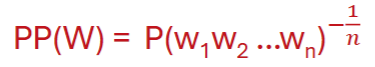

In [ ]:
import math

def calculate_perplexity_unsmoothed_bigram(test_tokens, bigram_probabilities, unigram_probabilities, vocabulary):
    if not test_tokens:
        return 0.0

    # Map OOV words in test_tokens to <UNK> if <UNK> is in the vocabulary, otherwise treat as fully OOV
    processed_test_tokens = [token if token in vocabulary else '<UNK>' for token in test_tokens]
    if '<UNK>' not in vocabulary:
        processed_test_tokens = [token if token in vocabulary else None for token in test_tokens] # None will cause inf

    log_prob_sum = 0.0
    N = len(processed_test_tokens)

    # Probability of the first word (using unigram)
    first_word = processed_test_tokens[0]
    p_first_word = unigram_probabilities.get(first_word, 0.0)
    if p_first_word == 0:
        return float('inf') # Unseen word at the start leads to infinite perplexity
    log_prob_sum += math.log(p_first_word)

    # Probabilities of subsequent words (using unsmoothed bigram)
    for i in range(1, N):
        word1 = processed_test_tokens[i-1]
        word2 = processed_test_tokens[i]

        p_bigram = bigram_probabilities.get((word1, word2), 0.0)
        if p_bigram == 0:
            return float('inf') # Zero probability bigram leads to infinite perplexity
        log_prob_sum += math.log(p_bigram)

    perplexity = math.exp(-log_prob_sum / N)
    return perplexity

def calculate_perplexity_smoothed_bigram(test_tokens, smoothed_bigram_probabilities, unigram_probabilities, V, vocabulary, total_words):
    if not test_tokens:
        return 0.0

    # Map OOV words in test_tokens to <UNK> if <UNK> is in the vocabulary, otherwise treat as fully OOV
    processed_test_tokens = [token if token in vocabulary else '<UNK>' for token in test_tokens]
    if '<UNK>' not in vocabulary:
        processed_test_tokens = [token if token in vocabulary else None for token in test_tokens] # None will cause inf

    log_prob_sum = 0.0
    N = len(processed_test_tokens)

    # Probability of the first word (using unigram)
    first_word = processed_test_tokens[0]
    # For the first word's probability, we'll use a smoothed unigram estimate
    # P(w1) = (Count(w1) + 1) / (TotalWords + V)
    # Or, if we rely on the existing unigram_probabilities, which are unsmoothed, we need to be careful
    # Let's use the existing unigram_probabilities and apply a similar smoothing concept for OOV start words.
    p_first_word_unsmoothed = unigram_probabilities.get(first_word, 0.0)
    p_first_word = (word_counts.get(first_word, 0) + 1) / (total_words + V) # Laplace smoothed unigram

    if p_first_word == 0: # This should not happen with add-1 smoothing
        return float('inf')
    log_prob_sum += math.log(p_first_word)

    # Probabilities of subsequent words (using smoothed bigram)
    for i in range(1, N):
        word1 = processed_test_tokens[i-1]
        word2 = processed_test_tokens[i]

        p_bigram = smoothed_bigram_probabilities.get((word1, word2), 0.0)

        if p_bigram == 0: # Should not happen if word1, word2 are in unique_words (including <UNK>)
            # This implies a severe OOV word or a lookup issue.
            return float('inf')

        log_prob_sum += math.log(p_bigram)

    perplexity = math.exp(-log_prob_sum / N)
    return perplexity

In [ ]:
test_sentence_1 = "children have rights"
test_tokens_1 = test_sentence_1.split()

test_sentence_2 = "what was your childhood"
test_tokens_2 = test_sentence_2.split()

test_sentence_3 = "this is a very bad sentence with new words"
test_tokens_3 = test_sentence_3.split()

# Ensure vocabulary is set
vocabulary = set(unique_words)

print(f"--- Perplexity Calculation ---")

# Perplexity for test_sentence_1 (likely seen bigrams)
perp_unsmoothed_1 = calculate_perplexity_unsmoothed_bigram(test_tokens_1, bigram_probabilities, unigram_probabilities, vocabulary)
perp_smoothed_1 = calculate_perplexity_smoothed_bigram(test_tokens_1, smoothed_bigram_probabilities, unigram_probabilities, V, vocabulary, total_words)
print(f"\nTest Sentence: '{test_sentence_1}'")
print(f"  Unsmoothed Bigram Perplexity: {perp_unsmoothed_1:.2f}")
print(f"  Smoothed Bigram Perplexity: {perp_smoothed_1:.2f}")

# Perplexity for test_sentence_2 (likely seen bigrams)
perp_unsmoothed_2 = calculate_perplexity_unsmoothed_bigram(test_tokens_2, bigram_probabilities, unigram_probabilities, vocabulary)
perp_smoothed_2 = calculate_perplexity_smoothed_bigram(test_tokens_2, smoothed_bigram_probabilities, unigram_probabilities, V, vocabulary, total_words)
print(f"\nTest Sentence: '{test_sentence_2}'")
print(f"  Unsmoothed Bigram Perplexity: {perp_unsmoothed_2:.2f}")
print(f"  Smoothed Bigram Perplexity: {perp_smoothed_2:.2f}")

# Perplexity for test_sentence_3 (containing OOV words and potentially unseen bigrams)
perp_unsmoothed_3 = calculate_perplexity_unsmoothed_bigram(test_tokens_3, bigram_probabilities, unigram_probabilities, vocabulary)
perp_smoothed_3 = calculate_perplexity_smoothed_bigram(test_tokens_3, smoothed_bigram_probabilities, unigram_probabilities, V, vocabulary, total_words)
print(f"\nTest Sentence: '{test_sentence_3}'")
print(f"  Unsmoothed Bigram Perplexity: {perp_unsmoothed_3:.2f}")
print(f"  Smoothed Bigram Perplexity: {perp_smoothed_3:.2f}")

--- Perplexity Calculation ---

Test Sentence: 'children have rights'
  Unsmoothed Bigram Perplexity: inf
  Smoothed Bigram Perplexity: 144.80

Test Sentence: 'what was your childhood'
  Unsmoothed Bigram Perplexity: 10.10
  Smoothed Bigram Perplexity: 133.42

Test Sentence: 'this is a very bad sentence with new words'
  Unsmoothed Bigram Perplexity: inf
  Smoothed Bigram Perplexity: 239.68
